<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Flavio Palacios y
    Diego Pintor.

**Fecha:** 1 de Marzo del 2021.

**Expediente** : if729825, 
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 5: Clase 09

## Link de github
[Github](https://github.com/Palacios-F/ProyectoConjunto_PalaciosFC_PintorD)

## Instrucciones
    
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

### Respuesta 1 Flavio Palacios

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Si consideramos la función de distribución acumulada entonces con el método de la transformada inversa podemos partir de la igualación de la función a una distribución uniforme $U$ quedandonos de la siguiente forma:
$$\frac{2}{\pi}\sin^{-1}(\sqrt x)=U$$
$$\sin^{-1}(\sqrt x)=\frac{\pi}{2}U$$
$$\sqrt x=\sin(\frac{\pi}{2}U)$$
$$\sqrt x=\sin(\frac{\pi}{2}U)$$
$$x=\sin^{2}(\frac{\pi}{2}U)$$
Quedandonos finalmente la expresión de:
$$x=\sin^{2}(\frac{\pi}{2}U),\quad 0\leq U\leq 1$$

Además para graficar y corroborar visualmente que nuestro trabajo ha sido realizado correctamente entonces calculamos la derivada de la función de distribución acumulada:

$$\frac{d}{dx}F(x)=\frac{d}{dx}(\frac{2}{\pi}\sin^{-1}(\sqrt x))=\frac{1}{\pi\sqrt{x(1-x)}}$$
$$f(x)=\frac{1}{\pi\sqrt{x(1-x)}}$$

In [5]:
def browniano(N: 'Número de muestras'):
    return (np.sin((np.pi/2)*np.random.rand(N)))**2

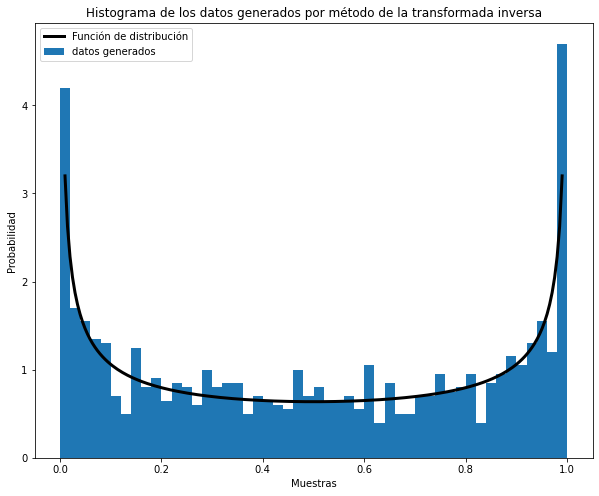

In [7]:
# Generación de datos
N = 1000
continua = browniano(N)

# Gráfica del histograma y de la función
plt.figure(figsize = (10,8))
plt.hist(continua,bins = 50, density = True, label = 'datos generados')
x = np.linspace(0.01,0.99,200)
y = lambda x: 1/(np.pi*(np.sqrt(x*(1-x))))
plt.plot(x,y(x),'k',lw = 3, label = 'Función de distribución')
plt.title('Histograma de los datos generados por método de la transformada inversa')
plt.ylabel('Probabilidad')
plt.xlabel('Muestras')
plt.legend()
plt.show()

### Respuesta 1 Diego Pintor

### Respuesta 2 Flavio Palacios

In [9]:
def Binomial_acum(n:'Valor n de binomial',p:'Probabilidad'):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        Pr[i+1]=((p/(1-p))*(n-i)/(i+1))*Pr[i]
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)
def Inversa_binomial(p_acum: 'Probabilidad acumulada',N: 'Cantidad de números a generar'):
    index = range(0,n+1)
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(index)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)
    return y

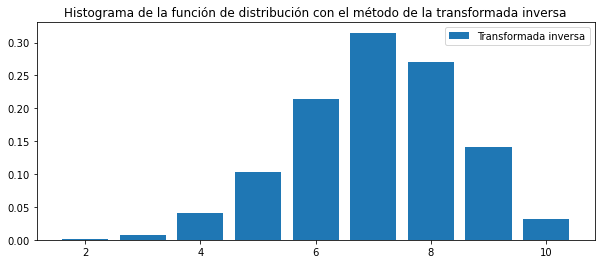

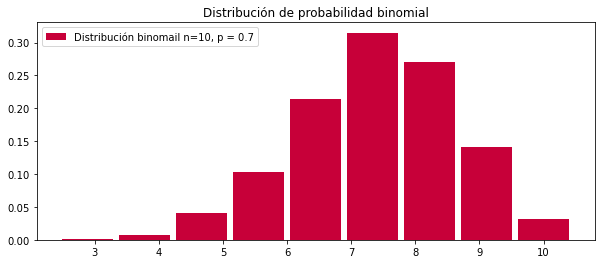

In [13]:
N = 1000
n = 10
p = 0.7
dis = Binomial_acum(n,p)
muestra = Inversa_binomial(dis,N)


# Histograma de la muestra generada por el método de la transformada inversa
plt.figure(figsize=[10,4])
y, x = np.histogram(muestra, bins=len(set(muestra)), density=True) 
plt.bar(range(min(muestra),11), y, label='Transformada inversa')
plt.legend()
plt.title('Histograma de la función de distribución con el método de la transformada inversa')
plt.show()

# Distribución de probabilidad original
bino = np.random.binomial(n,p,N)
plt.figure(figsize=[10,4])
y1, x1 = np.histogram(muestra, bins=len(set(muestra)), density=True) 
plt.bar(x[1:], y, color = '#C70039',label='Distribución binomail n=10, p = 0.7')
plt.title('Distribución de probabilidad binomial')
plt.legend()
plt.show()

### Respuesta 2 Diego Pintor